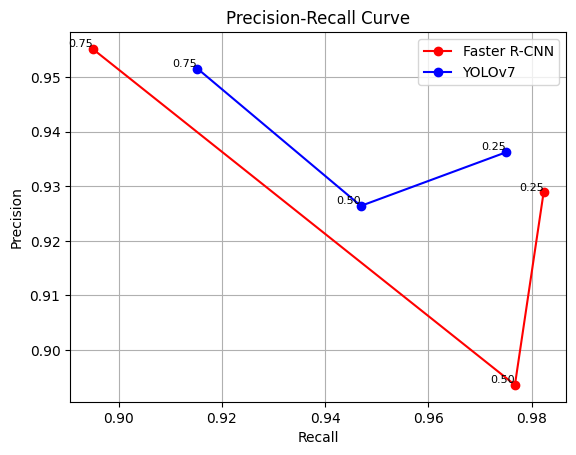

In [ ]:
import matplotlib.pyplot as plt

# DataforFaster R-CNN
conf_frcnn = [0.25, 0.50, 0.75]
tp_frcnn = [222, 210, 213]
fn_frcnn = [4, 5, 25]
fp_frcnn = [17, 25, 10]

# DataforYOLOv7
conf_yolo = [0.25, 0.50, 0.75]
tp_yolo = [235, 214, 216]
fn_yolo = [6, 12, 20]
fp_yolo = [16, 17, 11]


precision_frcnn = [tp / (tp + fp) for tp, fp in zip(tp_frcnn, fp_frcnn)]
recall_frcnn = [tp / (tp + fn) for tp, fn in zip(tp_frcnn, fn_frcnn)]


precision_yolo = [tp / (tp + fp) for tp, fp in zip(tp_yolo, fp_yolo)]
recall_yolo = [tp / (tp + fn) for tp, fn in zip(tp_yolo, fn_yolo)]


plt.plot(recall_frcnn, precision_frcnn, 'ro-', label='Faster R-CNN')
plt.plot(recall_yolo, precision_yolo, 'bo-', label='YOLOv7')


for x, y, conf in zip(recall_frcnn, precision_frcnn, conf_frcnn):
    plt.text(x, y, f'{conf:.2f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

for x, y, conf in zip(recall_yolo, precision_yolo, conf_yolo):
    plt.text(x, y, f'{conf:.2f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#counted tp,fn,fp values are inserted in this code
faster_rcnn = {
    0.25: {"TP": 222, "FN": 4, "FP": 17},
    0.50: {"TP": 210, "FN": 5, "FP": 25},
    0.75: {"TP": 213, "FN": 25, "FP": 10}
}


yolov7 = {
    0.25: {"TP": 235, "FN": 6, "FP": 16},
    0.50: {"TP": 214, "FN": 12, "FP": 17},
    0.75: {"TP": 216, "FN": 20, "FP": 11}
}

def calculate_precision_recall_f1(tp, fp, fn):
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return precision, recall, f1_score

conf_thresholds = sorted(list(faster_rcnn.keys()))

for conf in conf_thresholds:
    tp_fr = faster_rcnn[conf]["TP"]
    fn_fr = faster_rcnn[conf]["FN"]
    fp_fr = faster_rcnn[conf]["FP"]
    precision_fr, recall_fr, f1_score_fr = calculate_precision_recall_f1(tp_fr, fp_fr, fn_fr)

    tp_yv = yolov7[conf]["TP"]
    fn_yv = yolov7[conf]["FN"]
    fp_yv = yolov7[conf]["FP"]
    precision_yv, recall_yv, f1_score_yv = calculate_precision_recall_f1(tp_yv, fp_yv, fn_yv)

    print(f"Confidence Threshold: {conf}")
    print("Faster R-CNN:")
    print(f"  Precision: {precision_fr}")
    print(f"  Recall: {recall_fr}")
    print(f"  F1 Score: {f1_score_fr}")

    print("YOLOv7:")
    print(f"  Precision: {precision_yv}")
    print(f"  Recall: {recall_yv}")
    print(f"  F1 Score: {f1_score_yv}")
    print("\n")


Confidence Threshold: 0.25
Faster R-CNN:
  Precision: 0.9288702928870293
  Recall: 0.9823008849557522
  F1 Score: 0.9548387096774195
YOLOv7:
  Precision: 0.9362549800796812
  Recall: 0.975103734439834
  F1 Score: 0.9552845528455285


Confidence Threshold: 0.5
Faster R-CNN:
  Precision: 0.8936170212765957
  Recall: 0.9767441860465116
  F1 Score: 0.9333333333333332
YOLOv7:
  Precision: 0.9264069264069265
  Recall: 0.9469026548672567
  F1 Score: 0.9365426695842451


Confidence Threshold: 0.75
Faster R-CNN:
  Precision: 0.9551569506726457
  Recall: 0.8949579831932774
  F1 Score: 0.9240780911062906
YOLOv7:
  Precision: 0.9515418502202643
  Recall: 0.9152542372881356
  F1 Score: 0.9330453563714902


